#### 2


### a

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample

In [58]:
dataset = pd.read_csv('../Data_Raw/diabetes.csv')

In [59]:
print(dataset.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [60]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [61]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
dataset[cols_with_zeros] = dataset[cols_with_zeros].replace(0, np.nan)
     

In [62]:
print("\These are the missing values after cleaning:")
print(dataset.isnull().sum())

\These are the missing values after cleaning:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [63]:
data_imputed = dataset.fillna(dataset.mean())
print("\nAll the missing Values after handling:")
print(data_imputed.isnull().sum())


All the missing Values after handling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [64]:
cfn = 'cfndiabetes.csv'
dataset.to_csv('../Data_Clean/'+cfn, index=False)
cd = pd.read_csv('../Data_Clean/cfndiabetes.csv')
print("\nLoading the cleaned dataset:")
print(cd.head())
cd.info()


Loading the cleaned dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1  

In [65]:
np.random.seed(79)
sample = dataset.sample(25)

In [66]:
population_mean_glucose = dataset['Glucose'].mean()
population_highest_glucose = dataset['Glucose'].max()
sample_mean_glucose = sample['Glucose'].mean()
sample_highest_glucose = sample['Glucose'].max()     

In [67]:
labels = ['Population Mean', 'Population Highest', 'Sample Mean', 'Sample Highest']
values = [population_mean_glucose, population_highest_glucose, sample_mean_glucose, sample_highest_glucose]

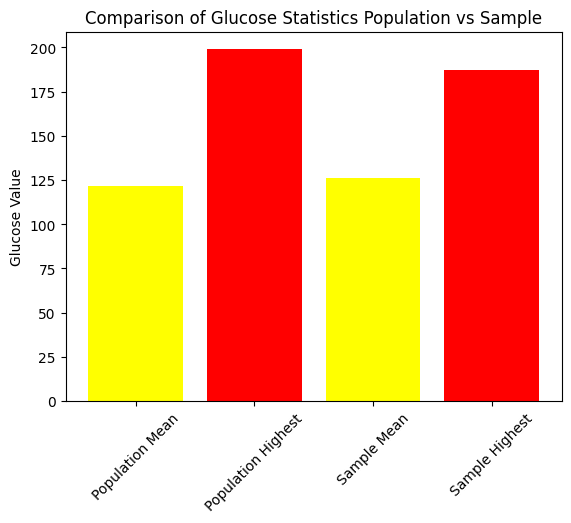

In [68]:
plt.bar(labels, values, color=['yellow', 'red', 'yellow', 'red'])
plt.title('Comparison of Glucose Statistics Population vs Sample')
plt.ylabel('Glucose Value')
plt.xticks(rotation=45)
plt.show()